<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [106]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install matplotlib-venn

  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 162.8 MB/s eta 0:00:0000:01
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45388 sha256=bc993c3e5ad1ec5940399ed60bb37fb107d985e4602ad60a4049017d5a3e5b93
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/c2/47/0c/f014c55a1cfd56dce41a1cafd23e3c590652b5e71330cc181c
Successfully built matplotlib-venn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [83]:
#checking input each column
columns = df.columns
for column in columns:
    group_df = df.groupby(column)[column].value_counts()
    filename = "group_" + column + ".csv"
    group_df.to_csv(filename,index = False)

In [84]:
#checking detail data, type, and missing count
missing_data = df.isnull().sum()
df_missing_data = pd.DataFrame(missing_data, columns=['count_missing'])
df_missing_data.index.name = 'Column_Name'
#df_missing_data
df_dtype = pd.DataFrame(df.dtypes, columns=['data_types'])
df_describe = df.describe(include='all').transpose()

missing_data_merge1 = pd.merge(df_dtype, df_missing_data, on='Column_Name', how='inner')
missing_data_merge = pd.merge(missing_data_merge1, df_describe, on='Column_Name', how='inner')
missing_data_merge.to_csv("df_detail.csv", index = True)

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [86]:
## Write your code here
for column in df.columns:
    if df[column].isnull().any(): # Check if the column has any missing values
        # Check if the column is of a numeric type (int, float)
        if pd.api.types.is_numeric_dtype(df[column]):
            # Fill with mean for numeric columns
            mean_value = df[column].mean()
            df[column].fillna(mean_value, inplace=True)
            #print(f"Imputed '{column}' (numeric) with mean: {mean_value:.2f}")
        # Check if the column is of object (string) or boolean type
        elif pd.api.types.is_object_dtype(df[column]) or pd.api.types.is_bool_dtype(df[column]):
            # Fill with mode for object/categorical columns
            # .mode()[0] is used because .mode() can return multiple modes if there's a tie
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)

df.isnull().sum()

Column_Name
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [102]:
## Write your code here
columns = ['Employment','JobSat','YearsCodePro']
for column in columns:
    group_df = df.groupby(column)[column].value_counts()
    filename = "group_" + column + ".csv"
    group_df.to_csv(filename,index = True)

In [101]:
#correct the data mean
df_2 = pd.read_csv("group_JobSat.csv")
wrong_mean = df_2.iloc[7,0]
correct_mean = round(wrong_mean)

df['JobSat'].replace(wrong_mean, correct_mean, inplace=True)

/tmp/ipykernel_358/2003338113.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].replace(wrong_mean, correct_mean, inplace=True)


### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


/tmp/ipykernel_358/3704470034.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='JobSat', shade=True)


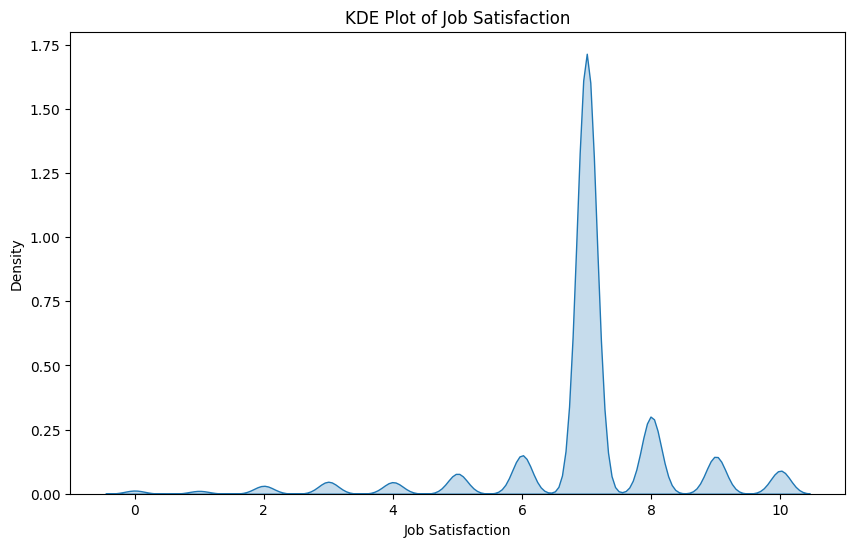

In [103]:
## Write your code here
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='JobSat', shade=True)

plt.title('KDE Plot of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Density')
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [104]:
## Write your code here
columns = ['LanguageHaveWorkedWith','LanguageWantToWorkWith']
for column in columns:
    group_df = df.groupby(column)[column].value_counts()
    filename = "group_" + column + ".csv"
    group_df.to_csv(filename,index = True)

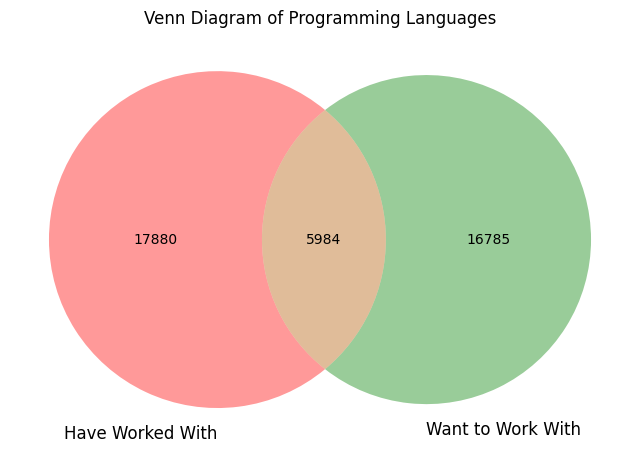

In [109]:
from matplotlib_venn import venn2
languages_worked_with = set(df['LanguageHaveWorkedWith'])
languages_want_to_work_with = set(df['LanguageWantToWorkWith'])

plt.figure(figsize=(8, 8))
venn2([languages_worked_with, languages_want_to_work_with], ('Have Worked With', 'Want to Work With'))
plt.title('Venn Diagram of Programming Languages')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


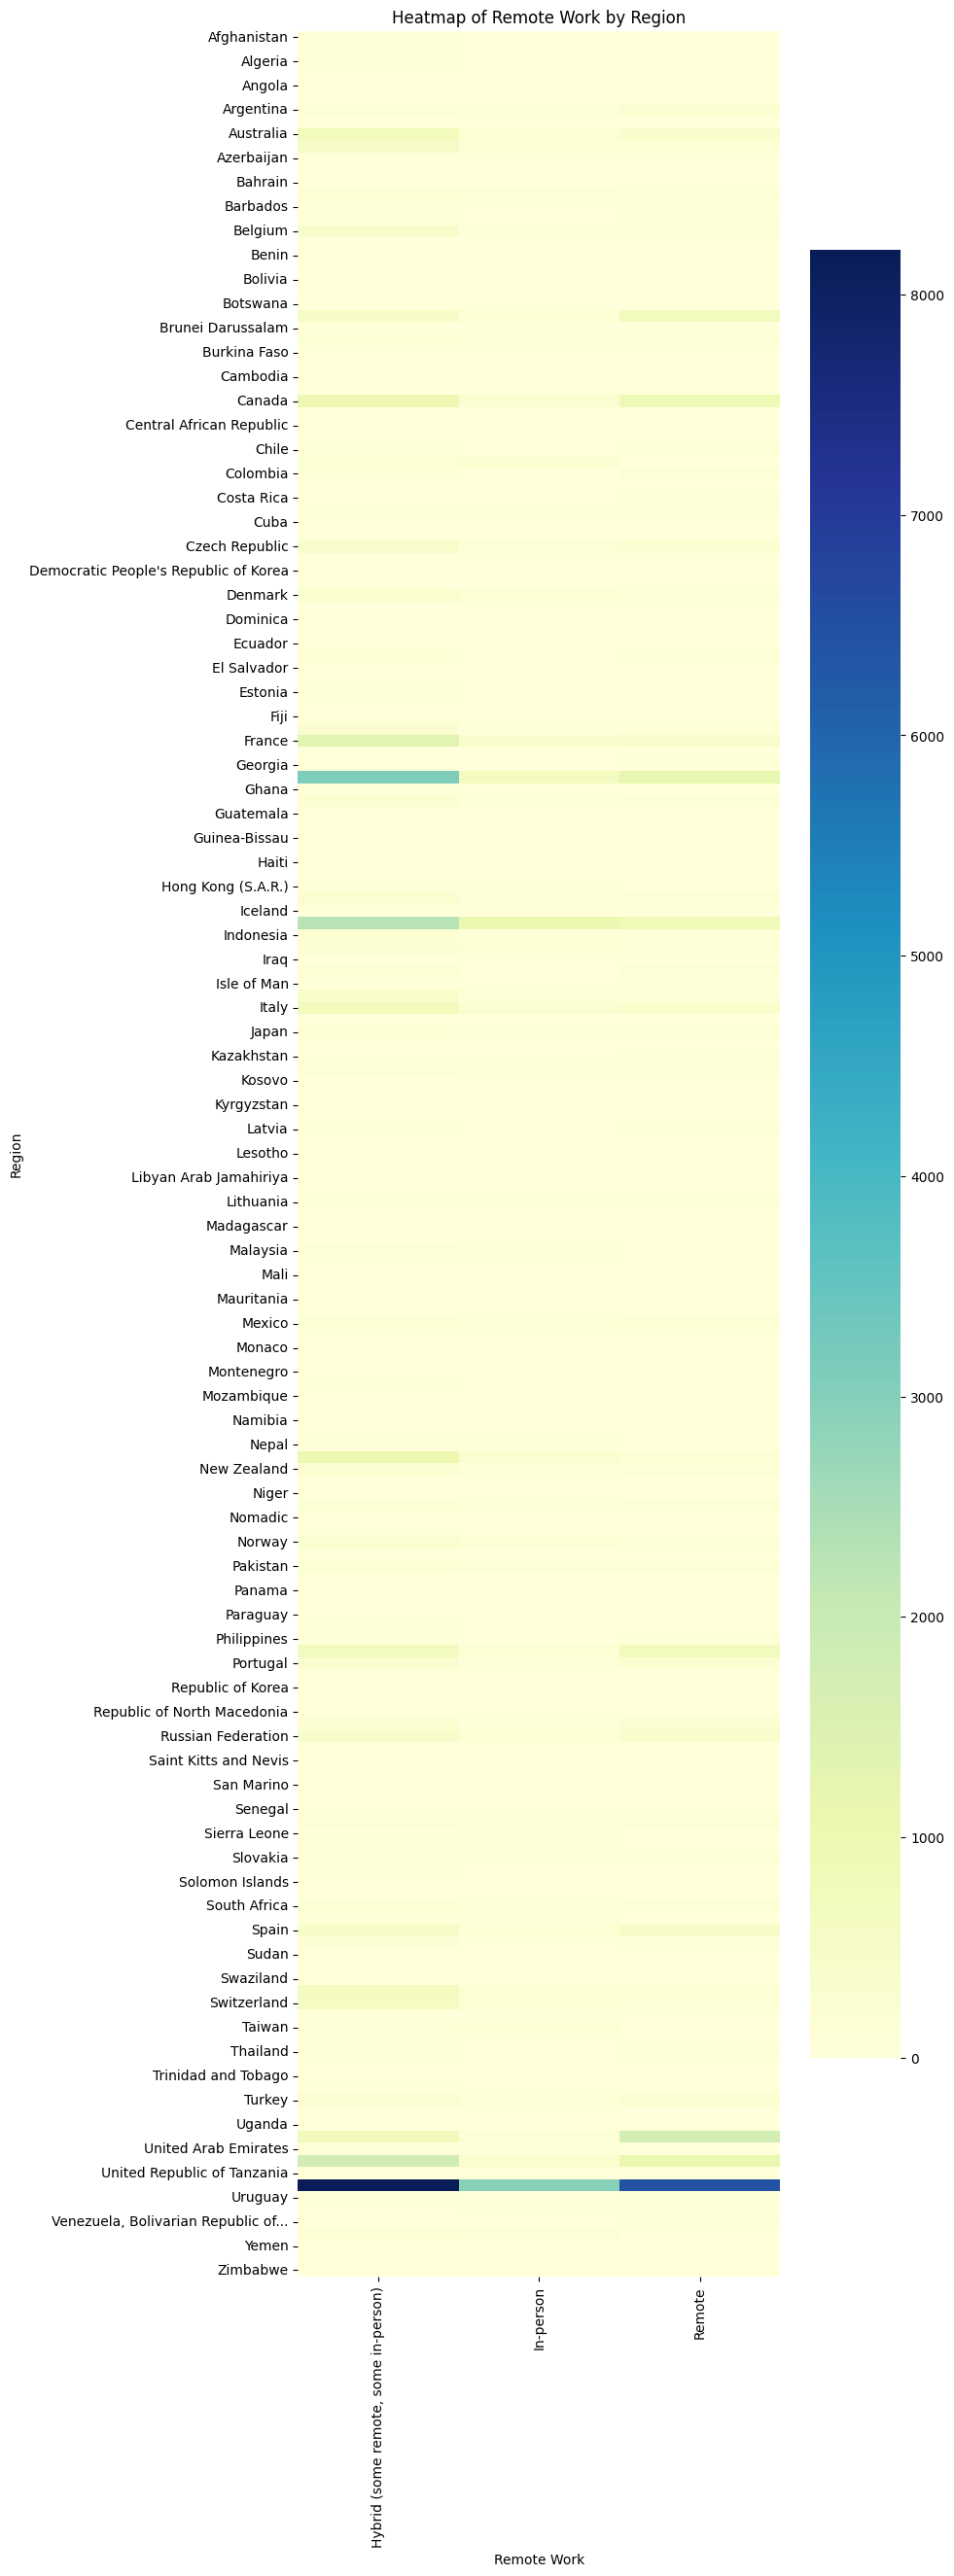

In [116]:
## Write your code here
# Create a pivot table for the heatmap
remote_work_pivot = df.pivot_table(index='Country', columns='RemoteWork', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(8, 30))
sns.heatmap(remote_work_pivot, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Remote Work by Region')
plt.xlabel('Remote Work')
plt.ylabel('Region')
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [117]:
## Write your code here
#normalize the data of YearsCodePro
df['YearsCodePro'].replace('Less than 1 year', 0, inplace=True)
df['YearsCodePro'].replace('More than 50 years', 51, inplace=True)
df['YearsCodePro'] = df['YearsCodePro'].astype(int)

In [118]:
pearson_corr = df['JobSat'].corr(df['YearsCodePro'], method='pearson')
print(f"Pearson Correlation Coefficient: {pearson_corr}")
spearman_corr = df['JobSat'].corr(df['YearsCodePro'], method='spearman')
print(f"Spearman Correlation Coefficient: {spearman_corr}")

Pearson Correlation Coefficient: 0.06576238595463285
Spearman Correlation Coefficient: 0.10482907423246358


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [119]:
## Write your code here
crosstab = pd.crosstab(df['Employment'], df['EdLevel'])
print(crosstab)

EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                                                                   12   

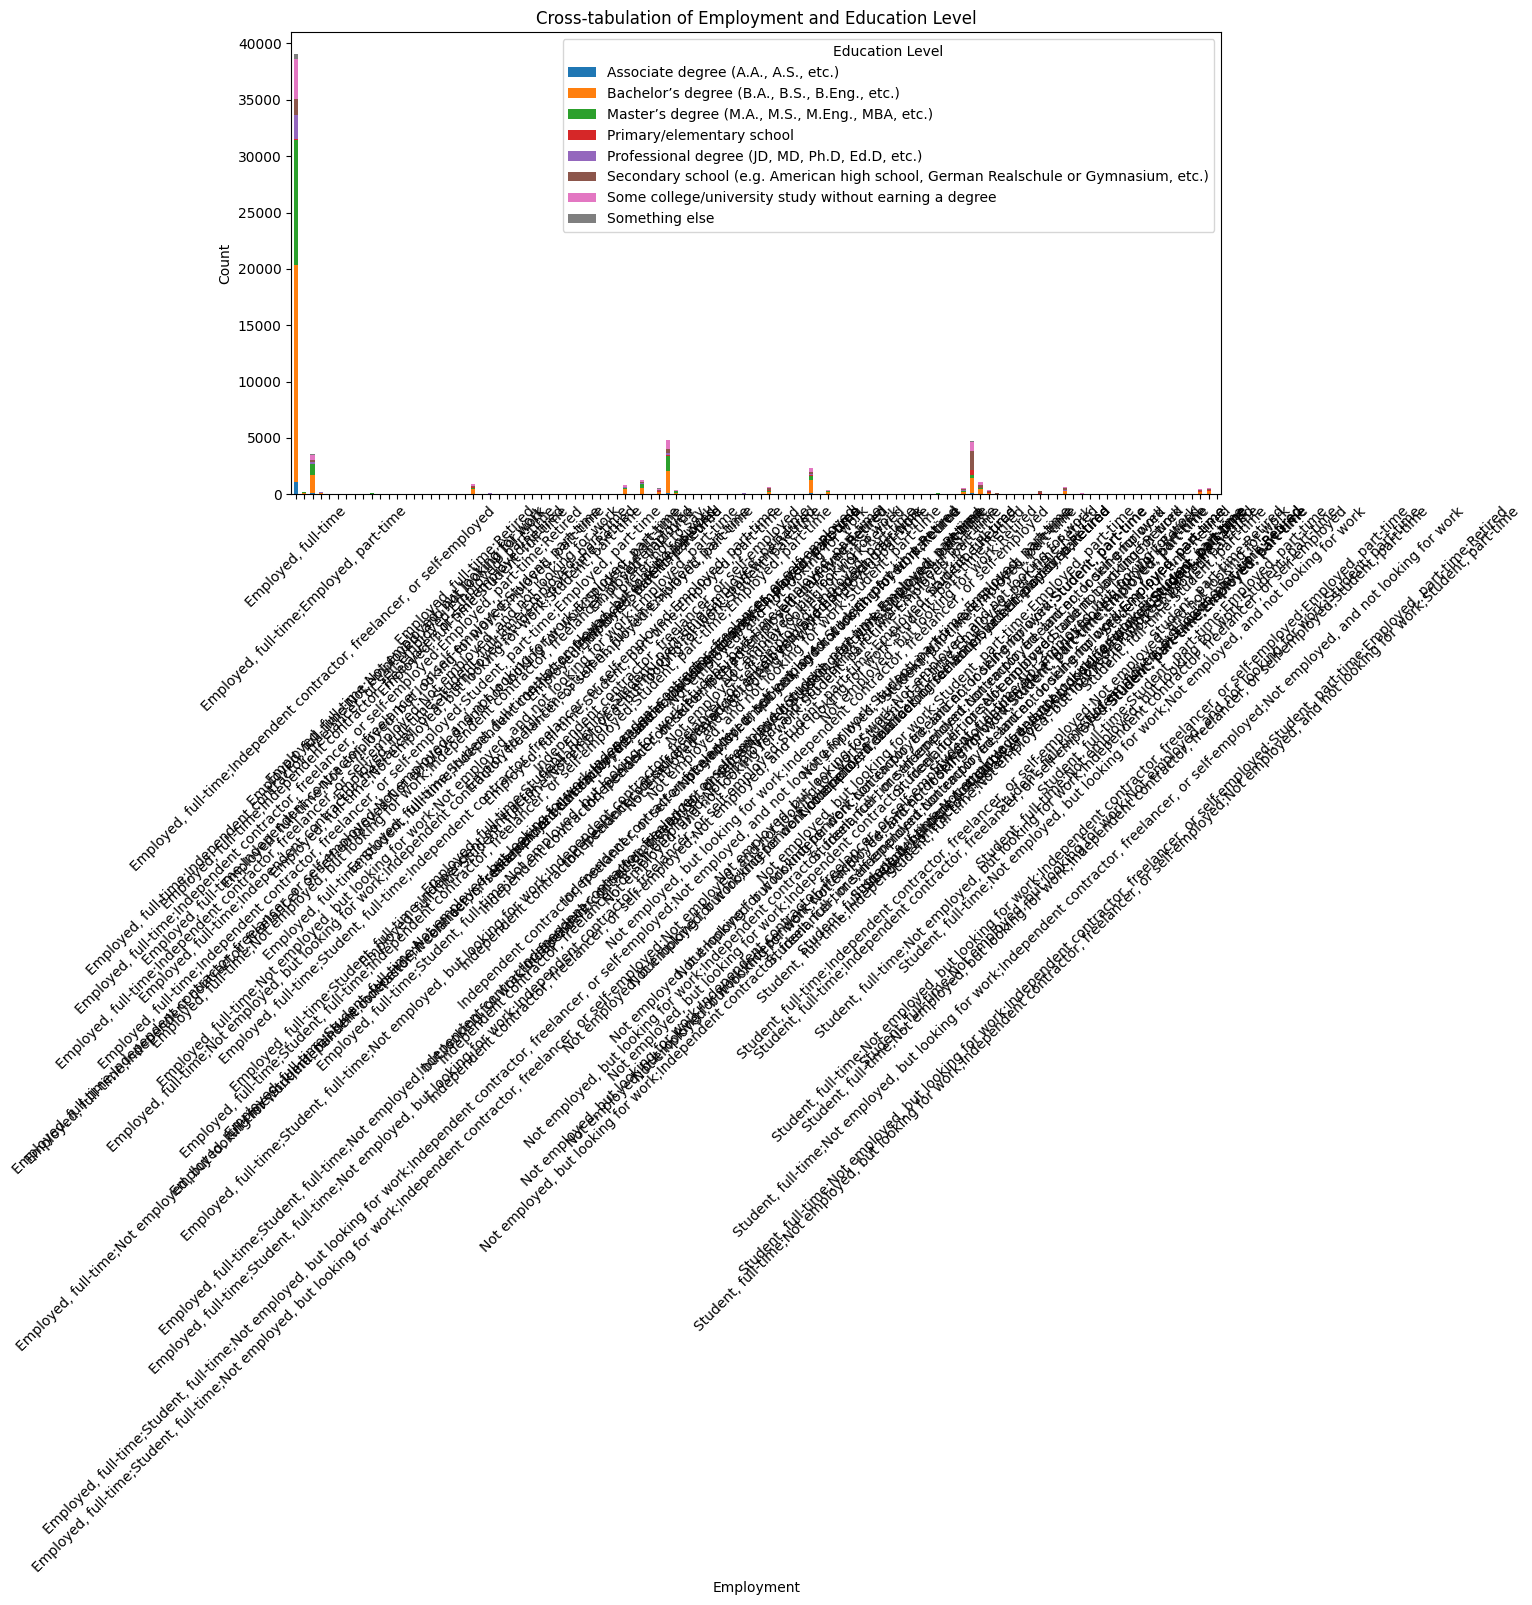

In [120]:
crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Cross-tabulation of Employment and Education Level')
plt.xlabel('Employment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level')
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [121]:
## Write your code here
df.to_csv("survey_data_lab11.csv")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
